<a href="https://colab.research.google.com/github/Kartikeya-04/Gold_Price/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NAME** - KARTIKEYA PANDEY

#**SAP ID** - 60009220215
#**D1-2**

**Importing Modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
plt.style.use("Solarize_Light2")

In [ ]:


from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.metrics import mean_squared_error  , mean_absolute_error
from scipy.stats import zscore
from sklearn.metrics import r2_score

**Importing Dataset**

In [ ]:
gold_data = pd.read_csv("/content/FINAL_USO.csv")


In [ ]:
gold_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
gold_data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


**DATA INFORMATION**

In [ ]:

gold_data.shape

(1718, 81)

In [ ]:
gold_data.describe()


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


**CHECKING FOR NULL VALUES**

In [ ]:
gold_data.info()
gold_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

**NO. OF COLUMNS**

In [ ]:
gold_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

**CORRELSTION MATRIX AND DROPPING DATASET**

In [ ]:
# correlation_matrix=gold_data.corr()
# print(correlation_matrix["Open"])


In [ ]:
gold_data= gold_data.drop("Date" , axis = 1)
gold_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

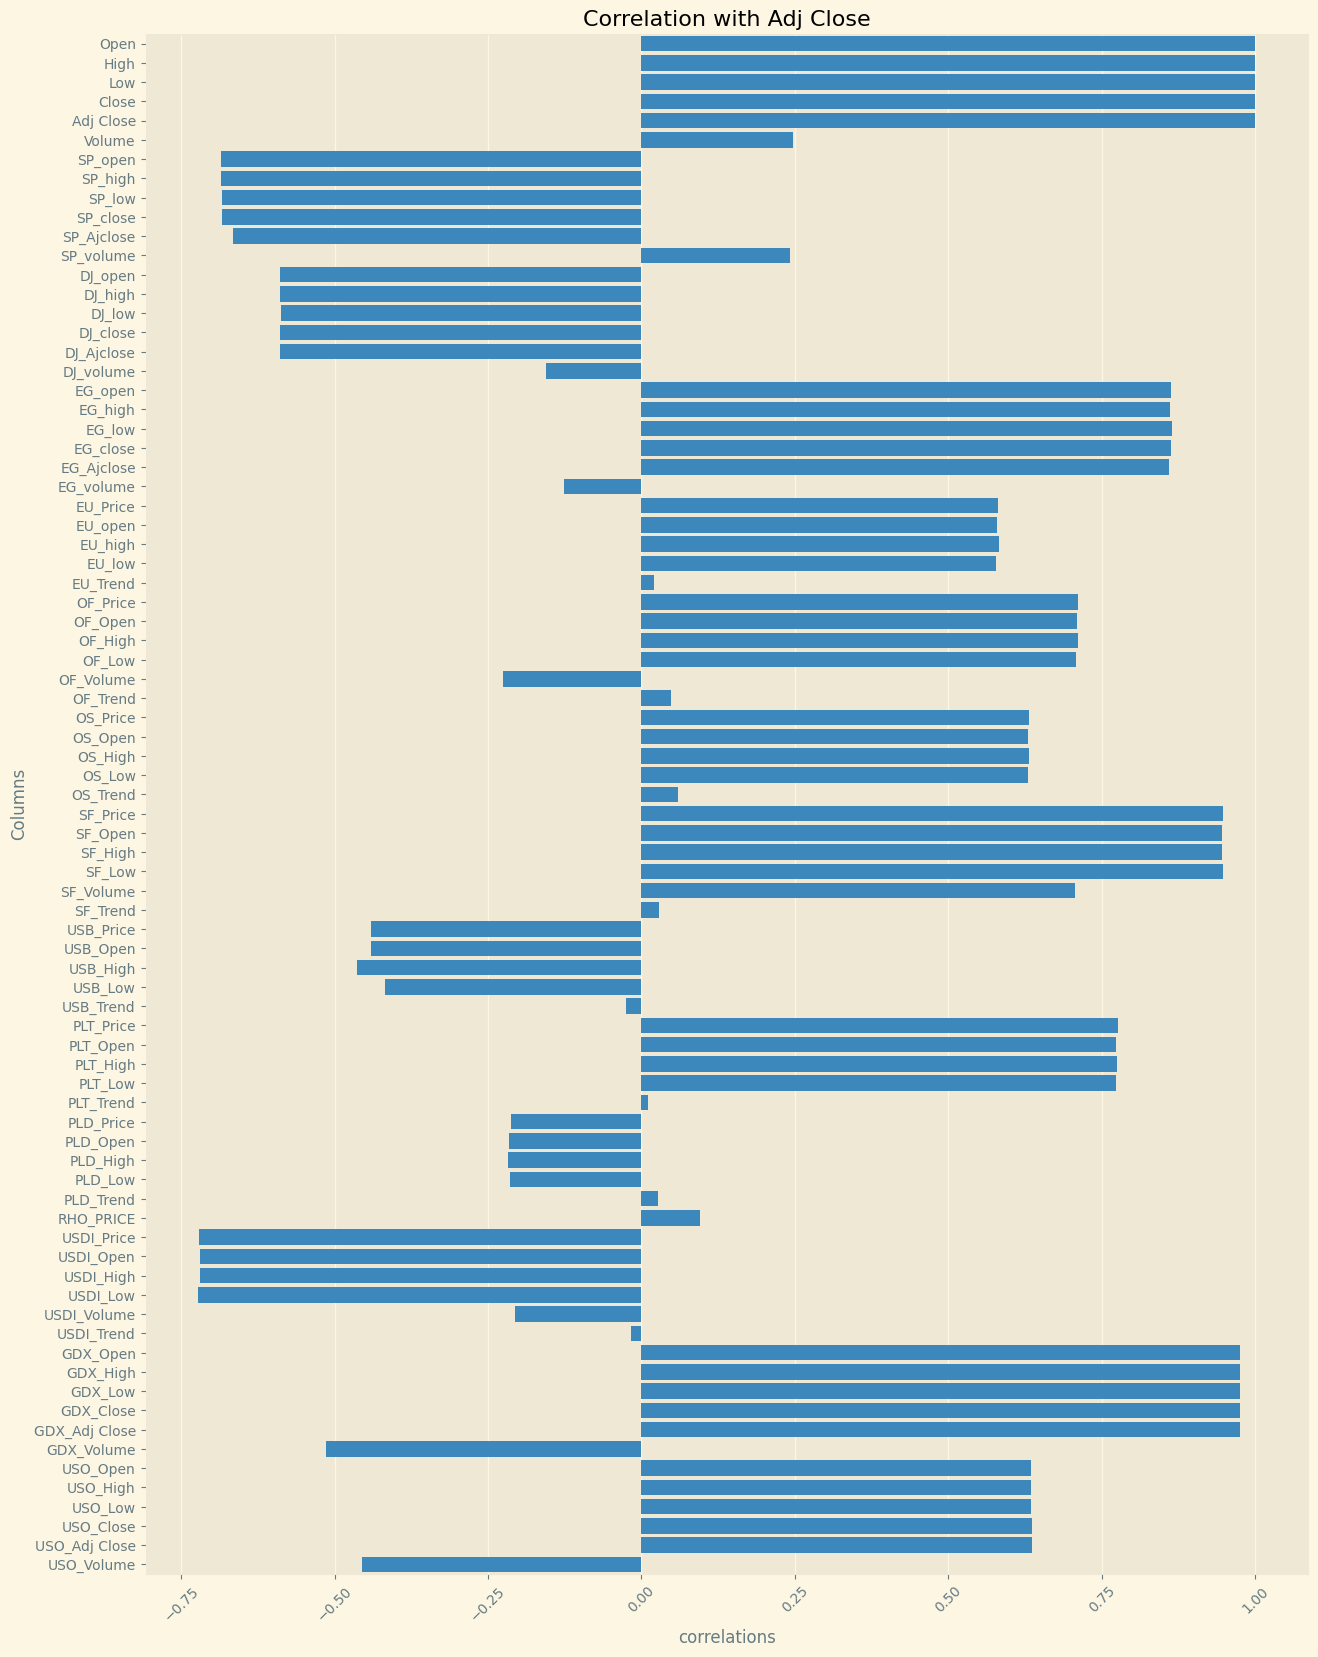

In [ ]:
target_column = 'Adj Close'

# Calculate the correlation matrix
correlation_matrix = gold_data.corr()

# Select the correlation values for the target column
correlations = correlation_matrix[target_column]

# Create a bar plot or heatmap to visualize the correlations
plt.figure(figsize=(15, 20))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title(f'Correlation with {target_column}')
plt.xlabel('correlations')
plt.ylabel('Columns')
plt.xticks(rotation=45)
plt.show()

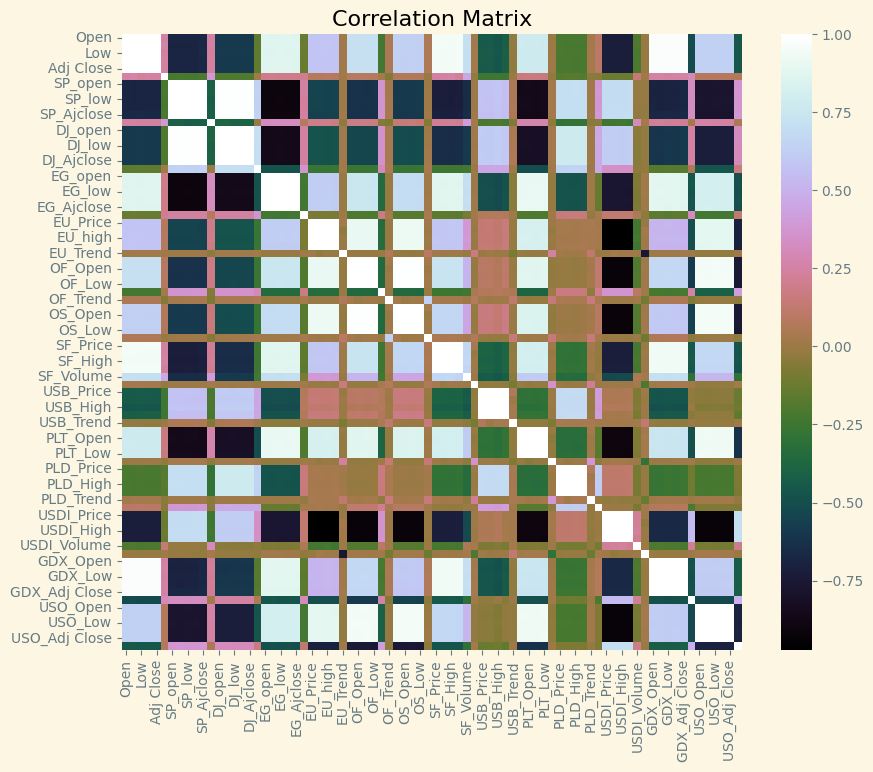

In [ ]:
numeric_columns = gold_data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_columns.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='cubehelix')

plt.title('Correlation Matrix')
plt.show()


In [ ]:
duplicate_rows = gold_data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

if num_duplicates > 0:
    print("Duplicate rows found.")
    print("Number of duplicate rows:", num_duplicates)
    print("Duplicate rows:")
    print(gold_data[duplicate_rows])
else:
    print("No duplicate rows found.")

No duplicate rows found.


**HISTOGRAM**

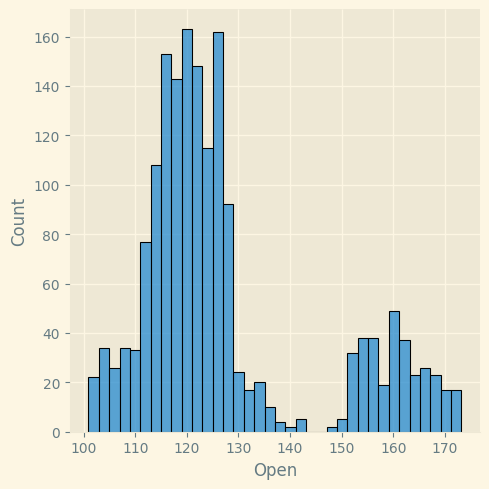

In [ ]:
sns.displot(gold_data["Open"])


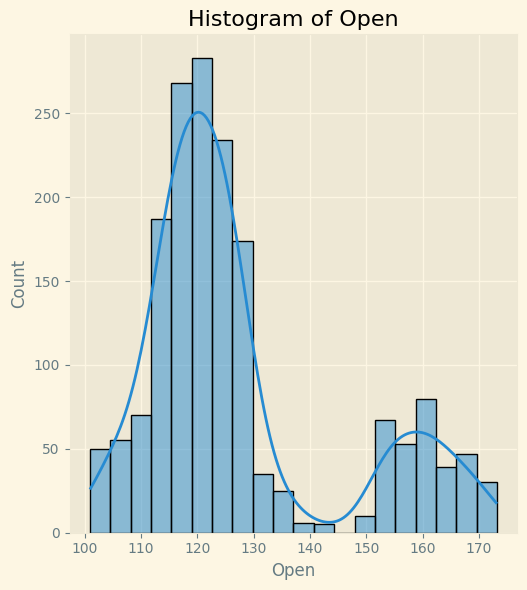

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
gold_data = pd.read_csv("/content/FINAL_USO.csv")

# Assuming you want to plot the 'Volume' column as countplot and 'Open' column as histplot
plt.figure(figsize=(10, 6))


# Create histplot for 'Open'
plt.subplot(1, 2, 2)
sns.histplot(data=gold_data, x='Open', bins=20, kde=True)
plt.title('Histogram of Open')

plt.tight_layout()
plt.show()


Above graph describes that the frequency of opening price - 120 is highest

The dataset is expansive, facilitating multifaceted exploration devoid of null or duplicate entries. Its cleanliness and breadth offer rich analytical potential, eliminating the necessity for addressing data gaps or redundancies, thus enhancing comprehensive insights.

In [ ]:
new_df = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Trend', 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend', 'PLD_Trend', 'RHO_PRICE', 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close']]

**No. of Outliers**

In [ ]:
def count_outliers(df, column_name, threshold=3):

    z_scores = zscore(df[column_name])

    num_outliers = np.sum(np.abs(z_scores) > threshold)

    print(f"number of outliers in {column_name}: ",num_outliers)

In [ ]:
for col in new_df.columns:
    count_outliers(new_df , col)

number of outliers in Open:  0
number of outliers in High:  0
number of outliers in Low:  0
number of outliers in Close:  0
number of outliers in Adj Close:  0
number of outliers in Volume:  23
number of outliers in SP_volume:  21
number of outliers in EG_open:  0
number of outliers in EG_high:  0
number of outliers in EG_low:  0
number of outliers in EG_close:  0
number of outliers in EG_Ajclose:  0
number of outliers in EU_Price:  0
number of outliers in EU_open:  0
number of outliers in EU_high:  0
number of outliers in EU_low:  0
number of outliers in EU_Trend:  0
number of outliers in OF_Price:  0
number of outliers in OF_Open:  0
number of outliers in OF_High:  0
number of outliers in OF_Low:  0
number of outliers in OF_Trend:  0
number of outliers in OS_Price:  0
number of outliers in OS_Open:  0
number of outliers in OS_High:  0
number of outliers in OS_Low:  0
number of outliers in OS_Trend:  0
number of outliers in SF_Price:  0
number of outliers in SF_Open:  0
number of outl

**DATA SELECTION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
features = ['Open', 'High', 'Low']

x = new_df[features]
y = new_df['Close']







In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state=42)


**Scaling The Dataset**

In [ ]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)


##**LINEAR REGRESSION MODEL**

In [ ]:
import pickle
linear = LinearRegression()
linear.fit(x_train_scaled , y_train)
y_pred = linear.predict(x_test_scaled)
print(f'valus is {y_pred}')


pickle.dump(linear, open('model2.pkl','wb'))

print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

valus is [127.67948846 116.28959566 156.58567273 155.14343103 131.83246831
 114.82850359 127.37039214 164.93730723 119.66756294 108.00908911
 102.53260081 104.38344269 153.55406873 119.23844318 134.67483247
 116.06231542 121.98651911 115.93532765 127.52815086 105.02657497
 125.96033441 129.4118386  121.82123344 125.82457875 119.88671621
 113.17773448 112.26326973 111.58533843 161.46172794 122.07575362
 118.59175473 120.26277686 119.48583833 136.94125391 120.20996194
 108.61885188 114.07388826 124.51393253 131.48701867 161.87050091
 167.48339892 109.17453207 126.37679692 117.09371226 119.91679034
 118.7789839  119.70852128 120.9305991  115.78879768 120.00607188
 129.398079   171.70602499 117.6793533  162.48683193 120.98998879
 127.09706193 113.13002541 117.29698461 125.16663489 121.78554425
 121.14510924 113.68264787 112.2131889  121.20343629 121.18304304
 119.10131499 127.02383649 112.52761659 128.03624753 118.88954865
 124.62092559 125.53610133 166.90718831 121.99891355 160.16140465
 

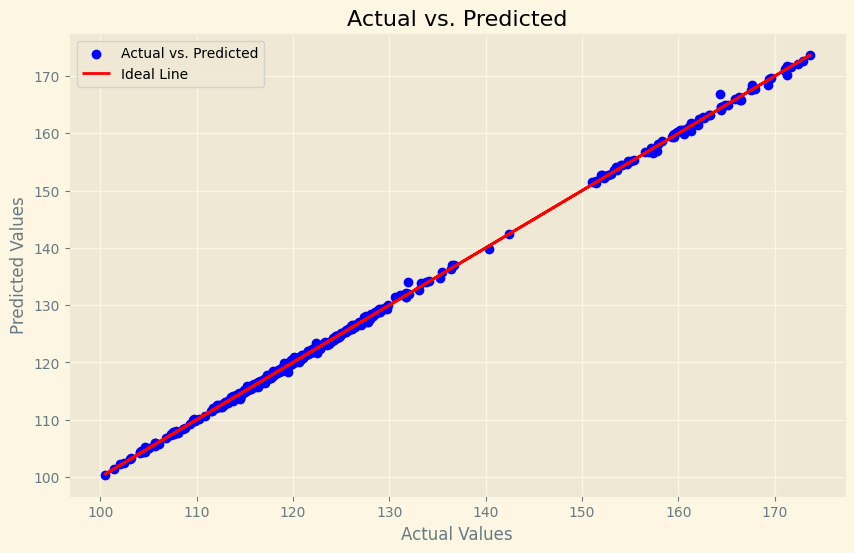

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Plotting the ideal line where actual = predicted
plt.plot(y_test, y_test, color='red', label='Ideal Line')

plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

**MODEL BUILDING**

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)


pickle.dump(scaler, open('scaler.pkl', 'wb'))

**PREDICTION**

In [ ]:
model = pickle.load(open('model2.pkl','rb'))
a=model.predict([[155,152,148]])
print(a)

[2724.72533585]


**RIDGE**

In [ ]:
rid = Ridge(alpha= 1)
rid.fit(x_train_scaled , y_train)
y_pred = rid.predict(x_test_scaled)

print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

0.9992653277137441
0.21897258522523855
0.2949812327546717


**LASSO**

In [ ]:
las = Lasso(alpha= 1)
las.fit(x_train_scaled , y_train)
y_pred = las.predict(x_test_scaled)

print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))


0.9959243089994214
1.2147791766097853
0.7969200416353142


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+02, tolerance: 3.998e+01
  model = cd_fast.enet_coordinate_descent(


**RANDOM FOREST MODEL**

In [ ]:
# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(x_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2407.9900794110195


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


**DECISION TREE MODEL**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(x_train_scaled, y_train)

# Make predictions on the testing set
y_pred_decision_tree = decision_tree_model.predict(x_test)

# Calculate mean squared error
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("Decision Tree - Mean Squared Error:", mse_decision_tree)


Decision Tree - Mean Squared Error: 2437.573798302497


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


**Support Vector Regression**

In [ ]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train_scaled, y_train)

# Make predictions on the testing set
y_pred_svr = svr_model.predict(x_test)

# Calculate mean squared error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("SVR - Mean Squared Error:", mse_svr)


SVR - Mean Squared Error: 380.1645788003712


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(x_train_scaled, y_train)

# Make predictions on the testing set
y_pred_knn = knn_model.predict(x_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN - Mean Squared Error:", mse_knn)


KNN - Mean Squared Error: 2367.8412016813536


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


##**From the above analysis we can conclude that Linear Regression is the best model to predict the Gold Price**